In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import pandas as pd

In [124]:
x = np.loadtxt('../../../bpignn/NVM/trainex/data/run10.dat')

In [125]:
x1 = x[:,:2]
x2 = x[:,2:]
x3 = -(x1+x2)

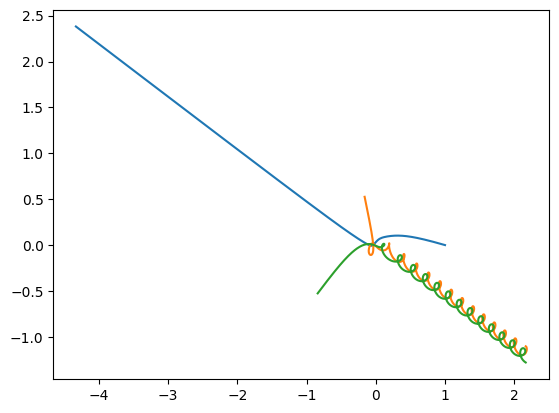

In [131]:
k = 0
l = 1000

plt.plot(x1[k:l,0], x1[k:l,1])
plt.plot(x2[k:l,0], x2[k:l,1])
plt.plot(x3[k:l,0], x3[k:l,1])

In [108]:
x.shape

(9, 4)

In [51]:
xs = np.concatenate([x1, x2, x3], axis=1)

In [62]:
vs = sum(coeffs_v[i] * xs[i:i-len(coeffs_v)] for i in range(len(coeffs_v)))

In [63]:
acs = sum(coeffs_a[i] * xs[i:i-len(coeffs_a)] for i in range(len(coeffs_a)))

In [68]:
xs = xs[:acs.shape[0]].reshape(-1, 3, 2)
vs = vs[:acs.shape[0]].reshape(-1, 3, 2)
acs = acs.reshape(-1, 3, 2)

In [70]:
xs.shape

(2553, 3, 2)

In [87]:
do_train = False

In [88]:
# coeffs_v = [1/280, -4/105, 1/5, -4/5, 0, 4/5, -1/5, 4/105, -1/280]
# coeffs_a = [-1/560, 8/315, -1/5, 8/5, -205/72, 8/5, -1/5, 8/315, -1/560]
# sh = 4

# coeffs_v = [-1/60, 3/20, -3/4, 0, 3/4, -3/20, 1/60]
# coeffs_a = [1/90, -3/20, 3/2, -49/18, 3/2, -3/20, 1/90]
# sh = 3

# coeffs_v = [1/12, -2/3, 0, 2/3, -1/12]
# coeffs_a = [-1/12, 4/3, -5/2, 4/3, -1/12]
# sh = 2

# coeffs_v = [-1/2, 0, 1/2]
# coeffs_a = [1, -2, 1]
# sh = 1

dt = 0.01

Zs_arrs = []
Zs_dot_arrs = []


folder = f'../../../bpignn/NVM/{"trainex" if do_train else "validex"}/data'

for c in tqdm.tqdm(sorted(os.listdir(folder))):
    
    x = np.loadtxt(f'{folder}/{c}')
    
    x1 = x[:,:2]
    x2 = x[:,2:]
    x3 = -(x1+x2)
    
    xs = np.concatenate([x1, x2, x3], axis=1).reshape(-1, 3, 2)
    vs = np.gradient(xs, axis=0, edge_order=2) / dt
    acs = np.gradient(vs, axis=0, edge_order=2) / dt
    
#     xs = np.concatenate([x1, x2, x3], axis=1)
#     vs = sum(coeffs_v[i] * np.roll(xs, shift=sh-i, axis=0) for i in range(2*sh+1))
#     acs = sum(coeffs_a[i] * np.roll(xs, shift=sh-i, axis=0) for i in range(2*sh+1))
    
#     xs = xs[sh:-sh].reshape(-1, 3, 2)
#     vs = vs[sh:-sh].reshape(-1, 3, 2) / dt
#     acs = acs[sh:-sh].reshape(-1, 3, 2) / dt**2
    
    Zs = np.concatenate([xs, vs], axis=1)
    Zs_dot = np.concatenate([vs, acs], axis=1)
        
    k = 1000
    print(c, Zs.shape, Zs_dot.shape)
    
    if Zs.shape[0] > k:
        for i in range(Zs.shape[0] // k):
            Zs_arrs.append(Zs[i*k:(i+1)*k])
            Zs_dot_arrs.append(Zs_dot[i*k:(i+1)*k])

 29%|█████████████████████████████████████████████████████████▊                                                                                                                                              | 26/90 [00:00<00:00, 126.44it/s]

run9910.dat (2561, 6, 2) (2561, 6, 2)
run9911.dat (2561, 6, 2) (2561, 6, 2)
run9912.dat (2561, 6, 2) (2561, 6, 2)
run9913.dat (2561, 6, 2) (2561, 6, 2)
run9914.dat (2561, 6, 2) (2561, 6, 2)
run9915.dat (2561, 6, 2) (2561, 6, 2)
run9916.dat (2561, 6, 2) (2561, 6, 2)
run9917.dat (2561, 6, 2) (2561, 6, 2)
run9918.dat (2561, 6, 2) (2561, 6, 2)
run9919.dat (2561, 6, 2) (2561, 6, 2)
run9920.dat (2561, 6, 2) (2561, 6, 2)
run9921.dat (2561, 6, 2) (2561, 6, 2)
run9922.dat (2561, 6, 2) (2561, 6, 2)
run9923.dat (2561, 6, 2) (2561, 6, 2)
run9924.dat (2561, 6, 2) (2561, 6, 2)
run9925.dat (2561, 6, 2) (2561, 6, 2)
run9926.dat (314, 6, 2) (314, 6, 2)
run9927.dat (33, 6, 2) (33, 6, 2)
run9928.dat (2561, 6, 2) (2561, 6, 2)
run9929.dat (2561, 6, 2) (2561, 6, 2)
run9930.dat (2326, 6, 2) (2326, 6, 2)
run9931.dat (2561, 6, 2) (2561, 6, 2)
run9932.dat (2561, 6, 2) (2561, 6, 2)
run9933.dat (120, 6, 2) (120, 6, 2)
run9934.dat (47, 6, 2) (47, 6, 2)
run9935.dat (2561, 6, 2) (2561, 6, 2)


 43%|██████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                 | 39/90 [00:00<00:00, 122.39it/s]

run9936.dat (343, 6, 2) (343, 6, 2)
run9937.dat (2561, 6, 2) (2561, 6, 2)
run9938.dat (2561, 6, 2) (2561, 6, 2)
run9939.dat (2561, 6, 2) (2561, 6, 2)
run9940.dat (2561, 6, 2) (2561, 6, 2)
run9941.dat (2561, 6, 2) (2561, 6, 2)
run9942.dat (2561, 6, 2) (2561, 6, 2)
run9943.dat (2561, 6, 2) (2561, 6, 2)
run9944.dat (2561, 6, 2) (2561, 6, 2)
run9945.dat (2561, 6, 2) (2561, 6, 2)
run9946.dat (2561, 6, 2) (2561, 6, 2)
run9947.dat (2561, 6, 2) (2561, 6, 2)
run9948.dat (2561, 6, 2) (2561, 6, 2)
run9949.dat (2561, 6, 2) (2561, 6, 2)
run9950.dat (2561, 6, 2) (2561, 6, 2)
run9951.dat (2040, 6, 2) (2040, 6, 2)
run9952.dat (2547, 6, 2) (2547, 6, 2)
run9953.dat (41, 6, 2) (41, 6, 2)
run9954.dat (2561, 6, 2) (2561, 6, 2)
run9955.dat (2561, 6, 2) (2561, 6, 2)
run9956.dat (2561, 6, 2) (2561, 6, 2)
run9957.dat (391, 6, 2) (391, 6, 2)
run9958.dat (30, 6, 2) (30, 6, 2)
run9959.dat (2298, 6, 2) (2298, 6, 2)
run9960.dat (2561, 6, 2) (2561, 6, 2)
run9961.dat (306, 6, 2) (306, 6, 2)


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                         | 64/90 [00:00<00:00, 101.48it/s]

run9962.dat (2561, 6, 2) (2561, 6, 2)
run9963.dat (2561, 6, 2) (2561, 6, 2)
run9964.dat (2561, 6, 2) (2561, 6, 2)
run9965.dat (2561, 6, 2) (2561, 6, 2)
run9966.dat (2561, 6, 2) (2561, 6, 2)
run9967.dat (2561, 6, 2) (2561, 6, 2)
run9968.dat (2561, 6, 2) (2561, 6, 2)
run9969.dat (2561, 6, 2) (2561, 6, 2)
run9970.dat (1950, 6, 2) (1950, 6, 2)
run9971.dat (2561, 6, 2) (2561, 6, 2)
run9972.dat (2561, 6, 2) (2561, 6, 2)
run9973.dat (2561, 6, 2) (2561, 6, 2)
run9974.dat (2561, 6, 2) (2561, 6, 2)
run9975.dat (2561, 6, 2) (2561, 6, 2)
run9976.dat (2561, 6, 2) (2561, 6, 2)
run9977.dat (2561, 6, 2) (2561, 6, 2)
run9978.dat (1661, 6, 2) (1661, 6, 2)
run9979.dat (2561, 6, 2) (2561, 6, 2)
run9980.dat (2561, 6, 2) (2561, 6, 2)
run9981.dat (2561, 6, 2) (2561, 6, 2)
run9982.dat (2561, 6, 2) (2561, 6, 2)
run9983.dat (2561, 6, 2) (2561, 6, 2)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 90/90 [00:00<00:00, 107.01it/s]

run9984.dat (2561, 6, 2) (2561, 6, 2)
run9985.dat (2561, 6, 2) (2561, 6, 2)
run9986.dat (2561, 6, 2) (2561, 6, 2)
run9987.dat (2561, 6, 2) (2561, 6, 2)
run9988.dat (2561, 6, 2) (2561, 6, 2)
run9989.dat (2561, 6, 2) (2561, 6, 2)
run9990.dat (2416, 6, 2) (2416, 6, 2)
run9991.dat (2561, 6, 2) (2561, 6, 2)
run9992.dat (33, 6, 2) (33, 6, 2)
run9993.dat (2561, 6, 2) (2561, 6, 2)
run9994.dat (403, 6, 2) (403, 6, 2)
run9995.dat (2561, 6, 2) (2561, 6, 2)
run9996.dat (2561, 6, 2) (2561, 6, 2)
run9997.dat (2561, 6, 2) (2561, 6, 2)
run9998.dat (2561, 6, 2) (2561, 6, 2)
run9999.dat (2561, 6, 2) (2561, 6, 2)


In [89]:
Zs_arrs = np.array(Zs_arrs)
Zs_dot_arrs = np.array(Zs_dot_arrs)

In [90]:
Zs_arrs.shape

(156, 1000, 6, 2)

In [91]:
pf = 'train' if do_train else 'test'
np.save(f'Zs_{pf}', Zs_arrs)
np.save(f'Zs_dot_{pf}', Zs_dot_arrs)

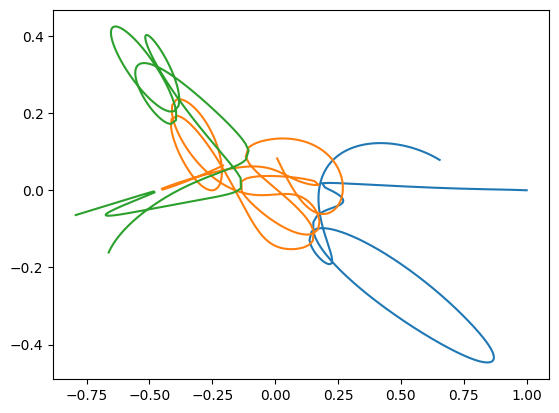

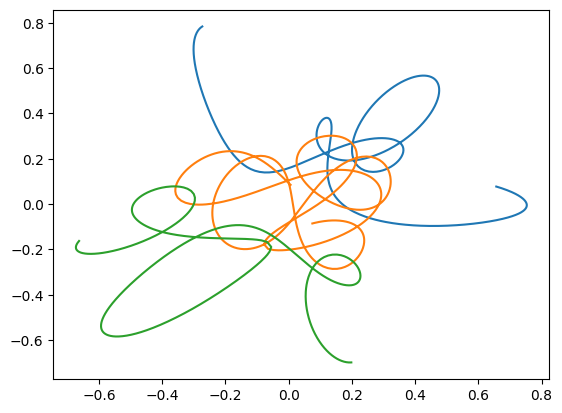

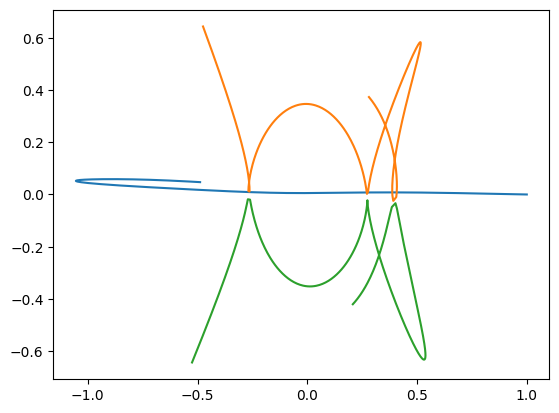

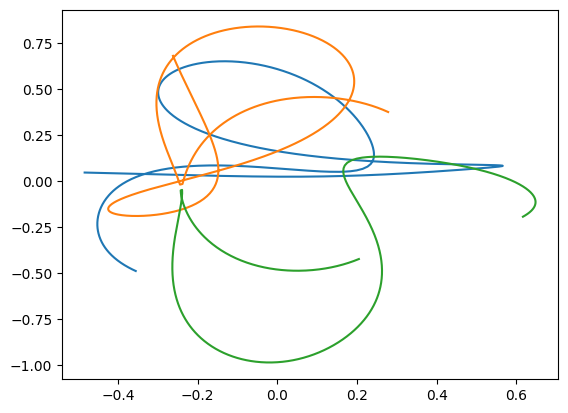

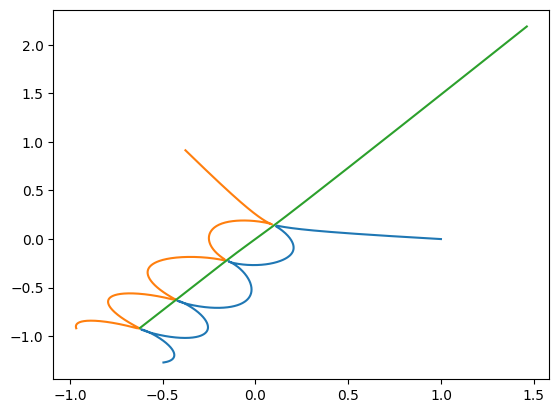

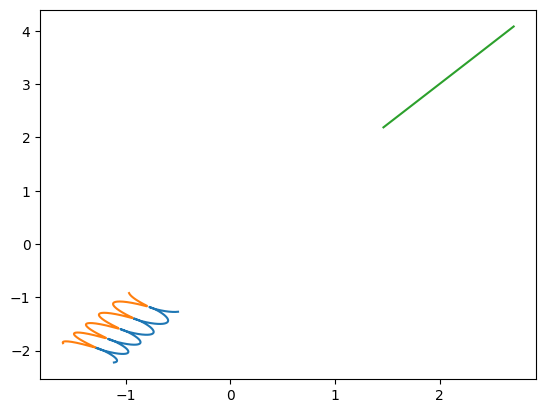

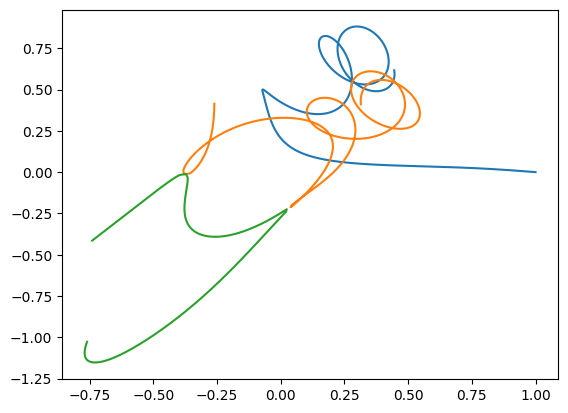

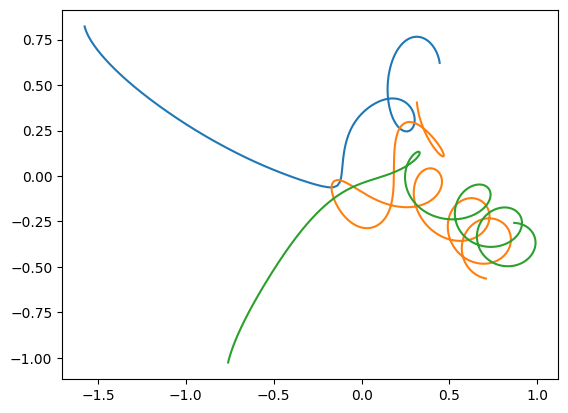

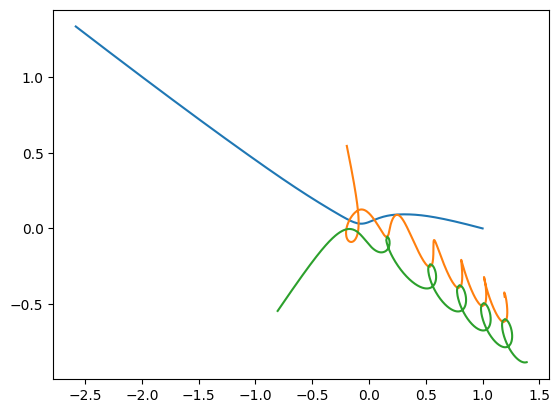

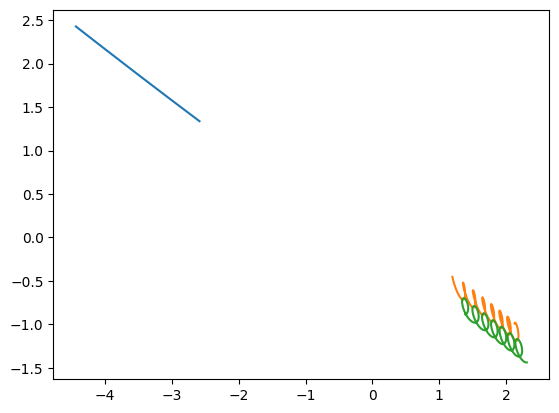

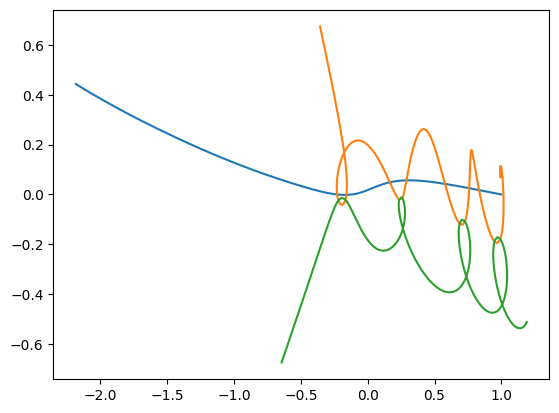

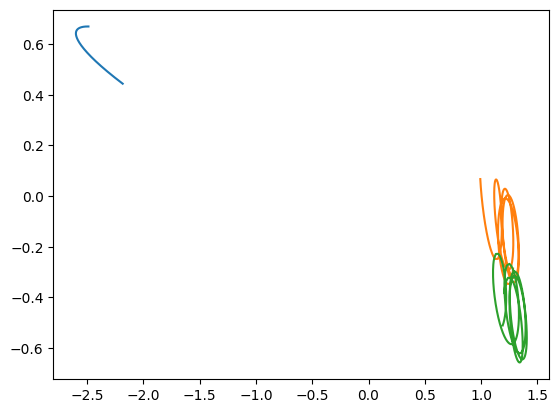

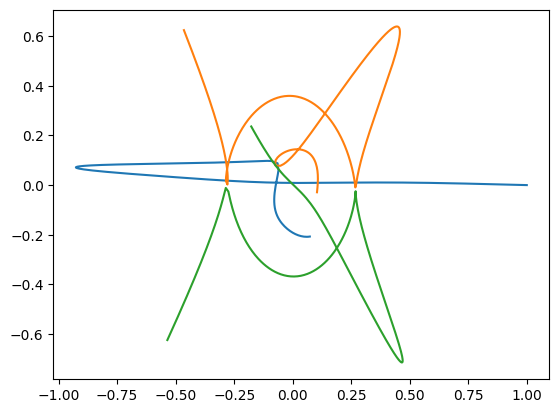

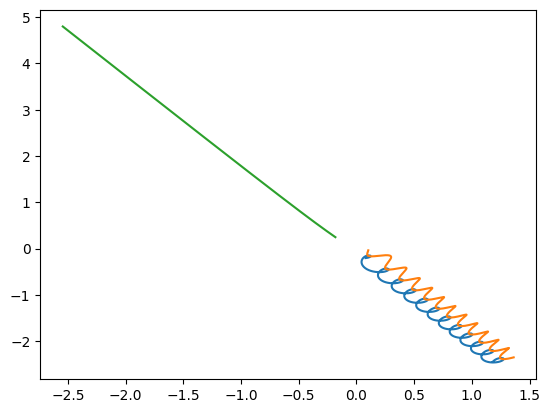

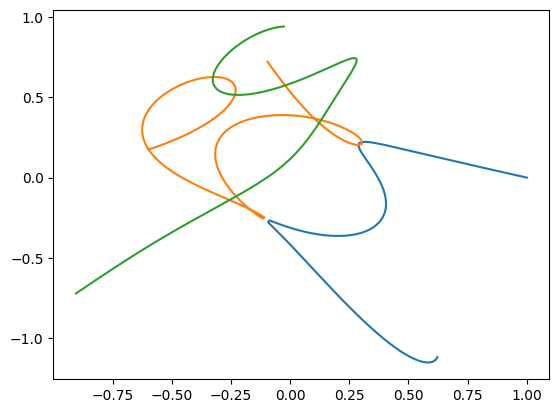

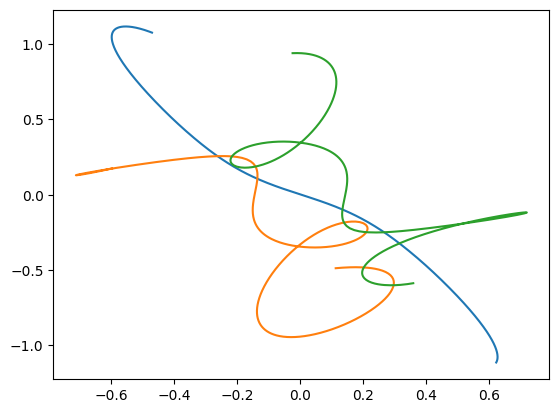

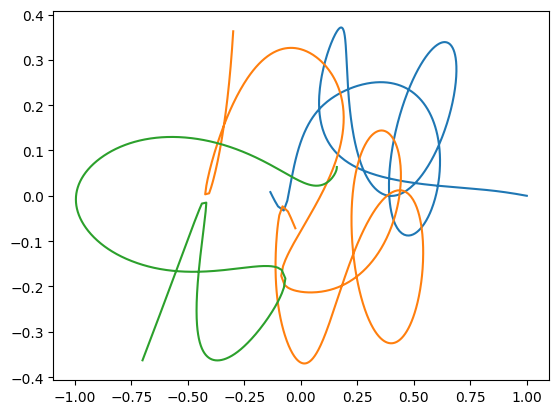

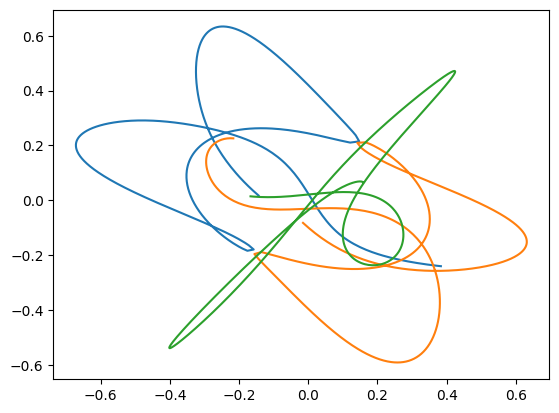

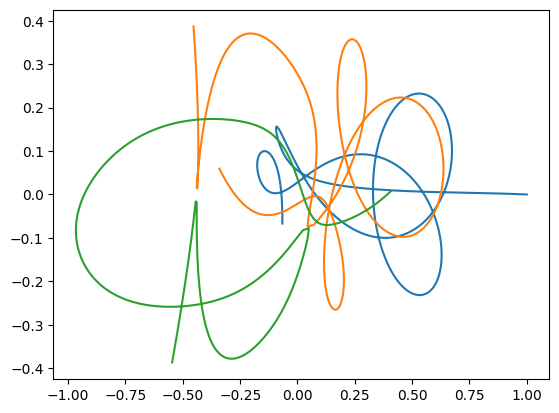

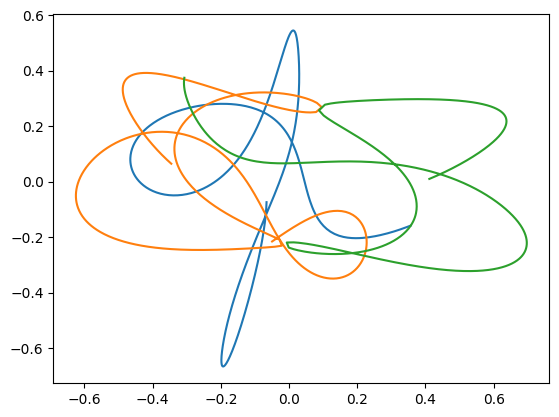

In [442]:
for p in range(20):

    for i in range(3):
        plt.plot(Zs_arrs[p, :, i, 0], Zs_arrs[p, :, i, 1])
    plt.show()

In [305]:
df.shape

(958394, 12)

In [316]:
df = pd.read_csv('../../../data/TBP_dataset.csv')

In [317]:
df

,r1_x,r1_y,r1_z,r2_x,r2_y,r2_z,r3_x,r3_y,r3_z,v1_x,...,v3_z,a1_x,a1_y,a1_z,a2_x,a2_y,a2_z,a3_x,a3_y,a3_z
0,1.472715,0.458162,-1.783420,-0.246754,0.304160,1.443783,-1.526091,0.599368,1.309417,-0.138412,...,0.007316,-0.014544,-0.000278,0.020936,-0.104642,0.026348,-0.024878,0.119186,-0.026070,0.003941
1,1.471713,0.458159,-1.783548,-0.245592,0.304225,1.444994,-1.525682,0.600784,1.309470,-0.138426,...,0.007320,-0.014535,-0.000274,0.020945,-0.104426,0.026398,-0.024952,0.118961,-0.026124,0.004007
2,1.470710,0.458156,-1.783676,-0.244432,0.304290,1.446205,-1.525272,0.602198,1.309523,-0.138441,...,0.007324,-0.014526,-0.000270,0.020953,-0.104210,0.026448,-0.025025,0.118736,-0.026178,0.004072
3,1.469708,0.458153,-1.783804,-0.243272,0.304355,1.447415,-1.524862,0.603613,1.309576,-0.138455,...,0.007328,-0.014517,-0.000266,0.020962,-0.103995,0.026497,-0.025098,0.118511,-0.026231,0.004137
4,1.468706,0.458149,-1.783932,-0.242113,0.304420,1.448625,-1.524450,0.605028,1.309629,-0.138470,...,0.007332,-0.014508,-0.000262,0.020970,-0.103780,0.026546,-0.025171,0.118287,-0.026285,0.004201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,-0.671892,0.837158,-1.447284,1.529639,-0.157186,-3.214849,0.834223,0.860264,-1.484105,-0.092193,...,-0.188842,0.104752,-0.006135,-0.015327,-0.030997,0.028697,0.049410,-0.073754,-0.022561,-0.034083
999996,-0.672559,0.836607,-1.447006,1.529738,-0.157412,-3.215630,0.833738,0.861488,-1.485473,-0.092089,...,-0.188876,0.104706,-0.006022,-0.015416,-0.030989,0.028704,0.049370,-0.073717,-0.022683,-0.033954
999997,-0.673226,0.836057,-1.446729,1.529836,-0.157636,-3.216412,0.833252,0.862711,-1.486840,-0.091984,...,-0.188910,0.104661,-0.005908,-0.015505,-0.030981,0.028712,0.049331,-0.073680,-0.022804,-0.033826
999998,-0.673891,0.835506,-1.446452,1.529933,-0.157861,-3.217193,0.832766,0.863934,-1.488208,-0.091879,...,-0.188943,0.104614,-0.005795,-0.015594,-0.030973,0.028719,0.049291,-0.073642,-0.022925,-0.033698


In [318]:
xx = np.array(df)

In [319]:
xx.shape

(1000000, 27)

In [336]:
xi = xx[:, :9].reshape(-1, 2000, 3, 3)
vi = xx[:, 9:18].reshape(-1, 2000, 3, 3)
ai = xx[:, 18:27].reshape(-1, 2000, 3, 3)

In [328]:
yy.shape

(500, 2000, 3, 3)

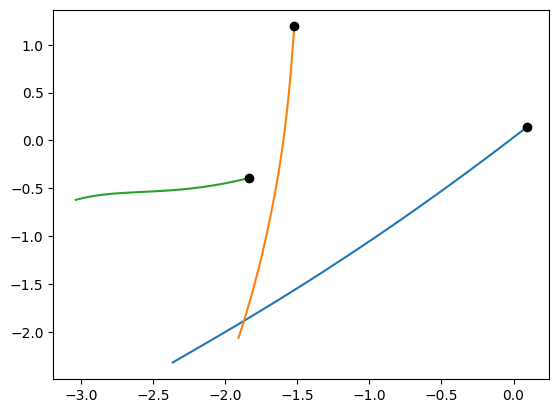

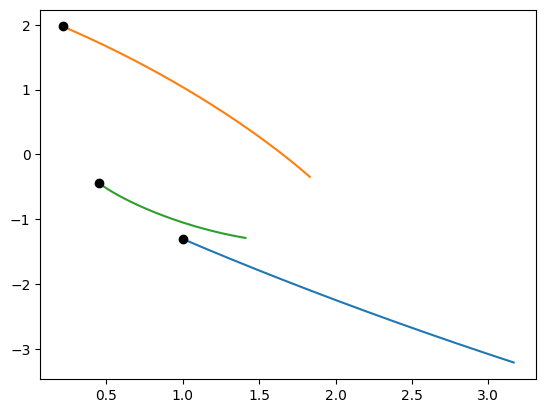

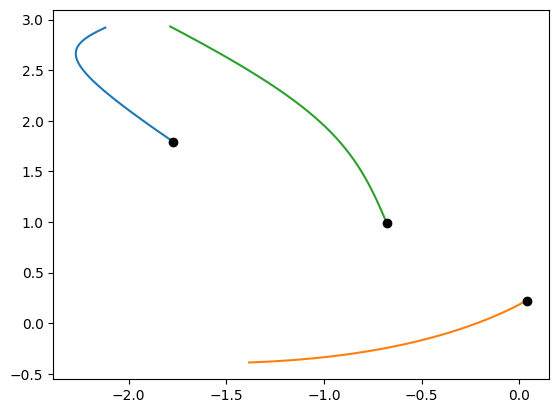

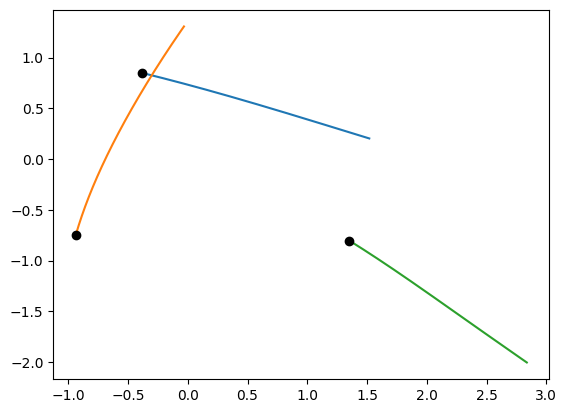

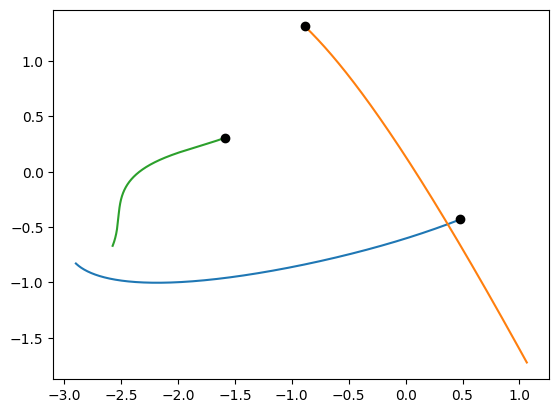

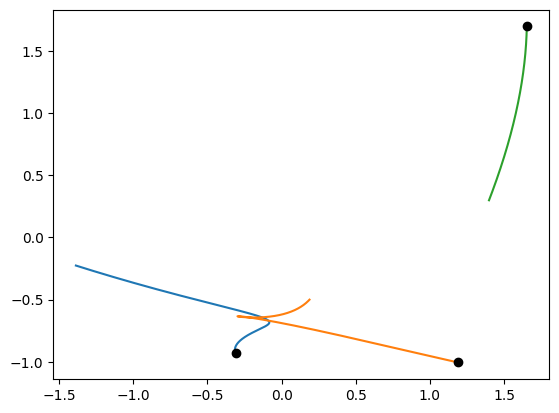

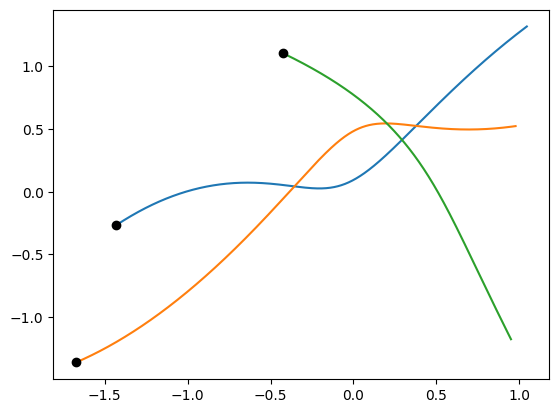

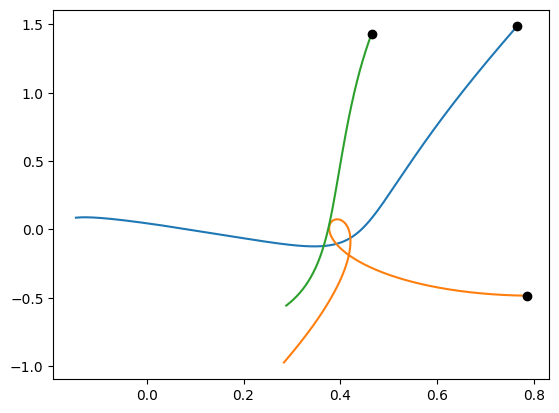

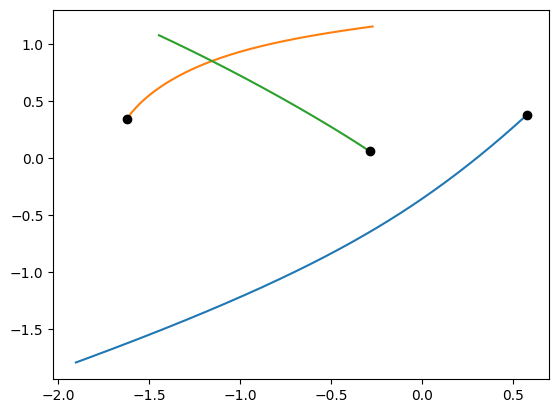

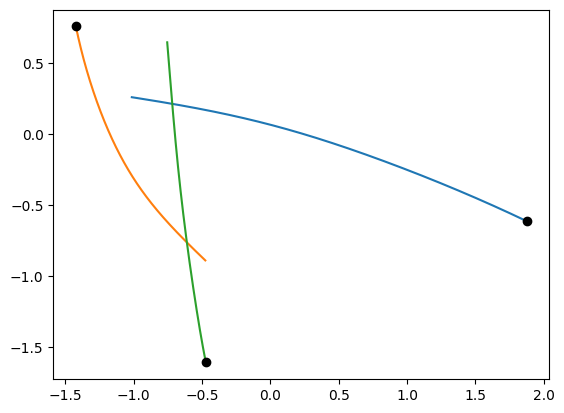

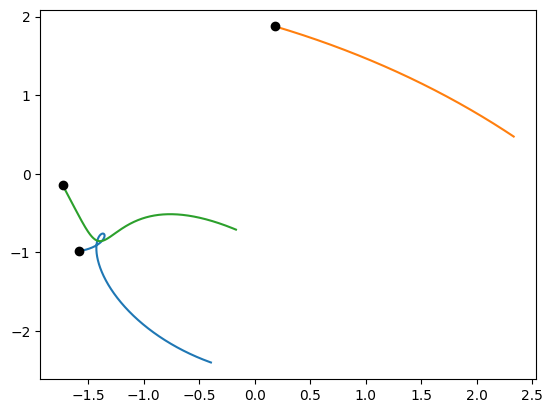

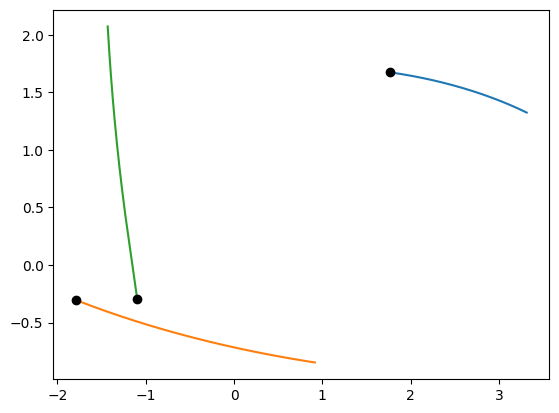

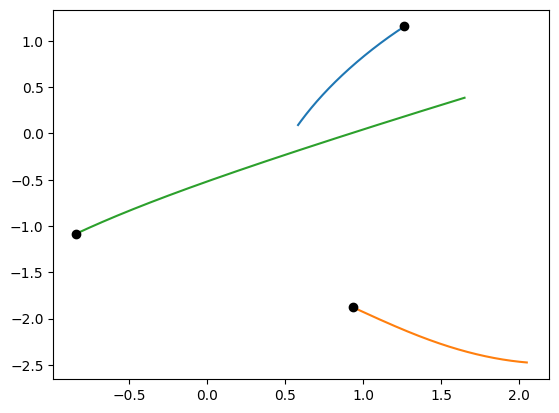

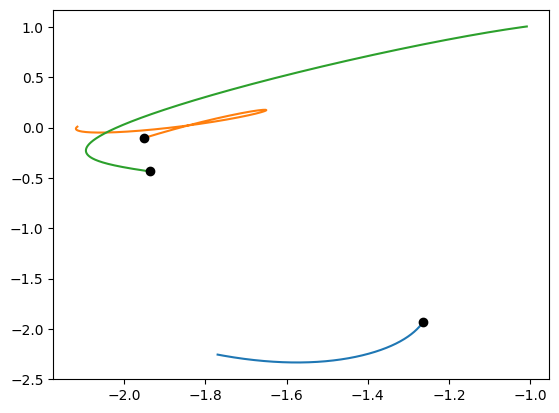

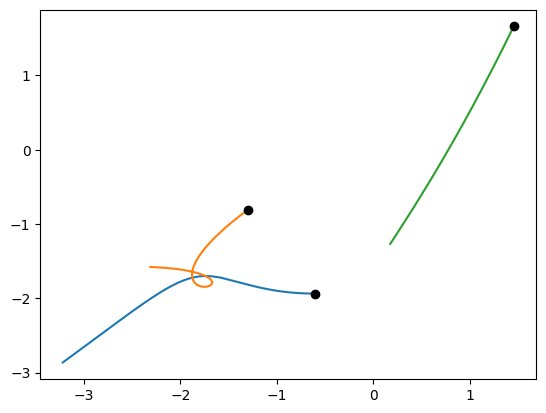

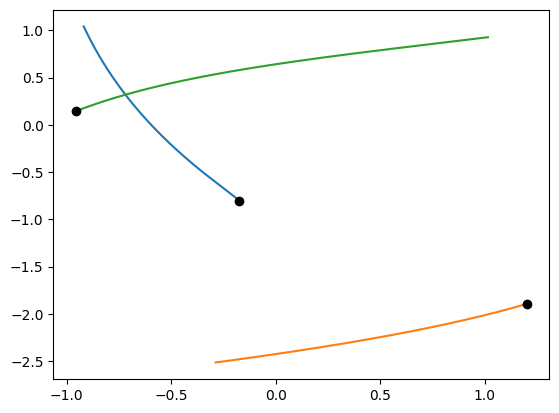

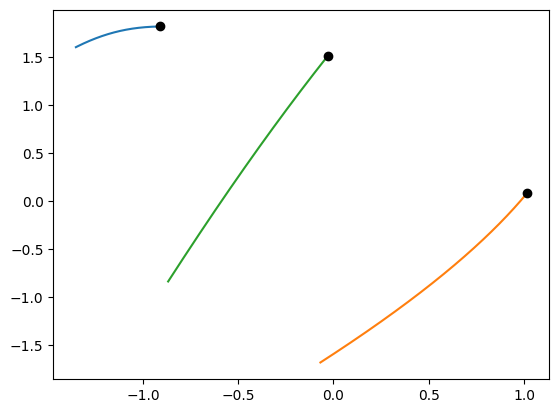

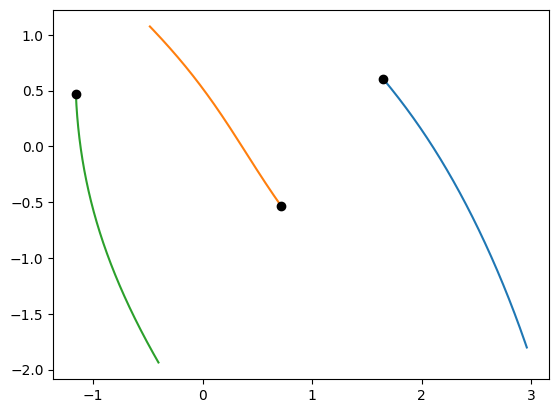

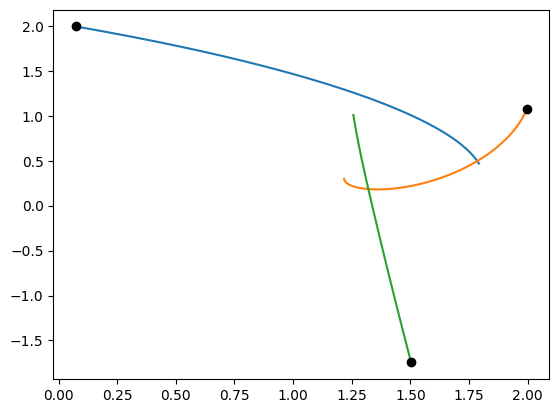

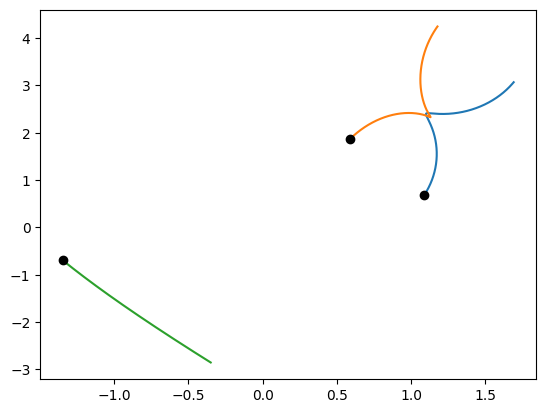

In [335]:
for p in range(80, 100):
    for i in range(3):
        plt.plot(yy[p, :, i, 0], yy[p, :, i, 1])
    plt.plot(yy[p, 0, :, 0], yy[p, 0, :, 1], 'o', color='black')
    plt.show()

In [338]:
zs_i = xx[:, :18].reshape(-1, 2000, 6, 3)
zs_dot_i = xx[:, 9:27].reshape(-1, 2000, 6, 3)

In [342]:
zs_i.shape, zs_dot_i.shape

((500, 2000, 6, 3), (500, 2000, 6, 3))

In [341]:
pf = '../nbody-n3-v2'

os.makedirs(pf, exist_ok=True)

np.save(f'{pf}/Zs_train', zs_i[:400])
np.save(f'{pf}/Zs_dot_train', zs_dot_i[:400])
np.save(f'{pf}/Zs_test', zs_i[400:])
np.save(f'{pf}/Zs_dot_test', zs_dot_i[400:])

In [56]:
acs

array([[[-1.25660107e-03,  2.72890481e-04],
        [ 3.27862199e-04, -1.20656615e-03],
        [ 9.28738871e-04,  9.33675668e-04]],

       [[-1.25673854e-03,  2.72908569e-04],
        [ 3.27888394e-04, -1.20668124e-03],
        [ 9.28850142e-04,  9.33772666e-04]],

       [[-1.25691532e-03,  2.72931826e-04],
        [ 3.27922077e-04, -1.20682923e-03],
        [ 9.28993241e-04,  9.33897405e-04]],

       ...,

       [[ 5.71531753e-06, -3.23881736e-06],
        [ 2.18934055e-02, -3.31329904e-02],
        [-2.18991209e-02,  3.31362292e-02]],

       [[ 5.71059595e-06, -3.23614881e-06],
        [ 2.36021970e-02, -3.23615378e-02],
        [-2.36079076e-02,  3.23647740e-02]],

       [[ 5.70581946e-06, -3.23352032e-06],
        [ 2.54035657e-02, -3.16170642e-02],
        [-2.54092715e-02,  3.16202978e-02]]])

In [82]:
np.gradient(np.gradient(xs, axis=0, edge_order=2) / dt, axis=0, edge_order=2) / dt

array([[[-1.25643255e-03,  2.72868304e-04],
        [ 3.27830083e-04, -1.20642506e-03],
        [ 9.28602463e-04,  9.33556753e-04]],

       [[-1.25646200e-03,  2.72872180e-04],
        [ 3.27835696e-04, -1.20644971e-03],
        [ 9.28626300e-04,  9.33577533e-04]],

       [[-1.25651599e-03,  2.72879285e-04],
        [ 3.27845985e-04, -1.20649492e-03],
        [ 9.28670003e-04,  9.33615632e-04]],

       ...,

       [[ 5.70111225e-06, -3.23087377e-06],
        [ 2.73699874e-02, -3.08837170e-02],
        [-2.73756885e-02,  3.08869479e-02]],

       [[ 5.69755914e-06, -3.22889544e-06],
        [ 2.88825869e-02, -3.03315531e-02],
        [-2.88882845e-02,  3.03347820e-02]],

       [[ 5.69518148e-06, -3.22757920e-06],
        [ 2.99150333e-02, -2.99627172e-02],
        [-2.99207285e-02,  2.99659448e-02]]])

In [52]:
xs.shape

(2555, 3, 2)